In [26]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)
df_DA_IN = df[(df['job_country']== 'India') & (df['job_title_short']=='Data Analyst')]
df_DA_IN

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"[sql, excel, word, powerpoint, outlook, power bi]","{'analyst_tools': ['excel', 'word', 'powerpoin..."
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,"[sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['sa..."
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785517,Data Analyst,Analyst - Data Analytics/SQL (2-9 yrs),"Gurugram, Haryana, India",via BeBee India,Full-time,False,India,2023-10-16 06:10:56,False,False,India,None,NaN,NaN,iimjobs,[power bi],{'analyst_tools': ['power bi']}
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785628,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,None,NaN,NaN,GUS Global Services India Pvt. Ltd.,"[r, python, sql, sap, power bi, tableau, excel]","{'analyst_tools': ['sap', 'power bi', 'tableau..."
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,"[sql, python, shell, sql server, tableau, micr...","{'analyst_tools': ['tableau', 'microstrategy']..."


In [27]:
df_plot = df_DA_IN['job_location'].value_counts().head(12).to_frame()
df_plot

,count
job_location,
India,2056
"Hyderabad, Telangana, India",1289
Anywhere,1052
"Bengaluru, Karnataka, India",355
"Maharashtra, India",203
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106


In [28]:
df_plot.drop(['India','Maharashtra, India'],inplace=True)
df_plot

,count
job_location,
"Hyderabad, Telangana, India",1289
Anywhere,1052
"Bengaluru, Karnataka, India",355
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106
"Secunderabad, Telangana, India",84
"Indore, Madhya Pradesh, India",71


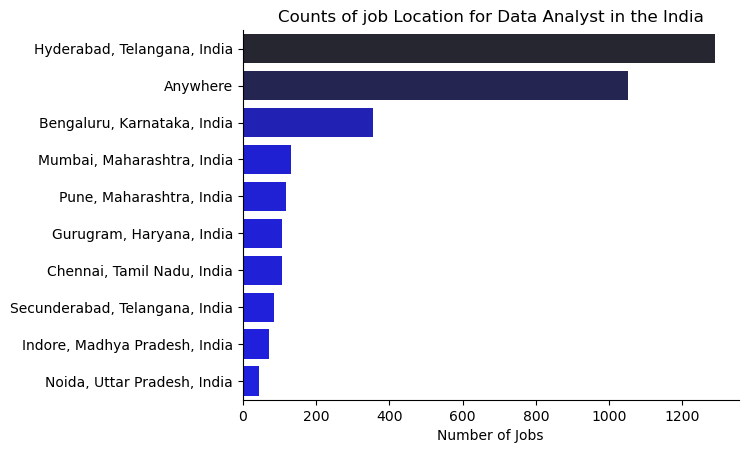

In [53]:
df_plot = df_plot.sort_values(by='count',ascending=False)
sns.barplot(data=df_plot , x='count',y='job_location',hue='count',palette='dark:b_r')
sns.despine()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Counts of job Location for Data Analyst in the India')
plt.legend().remove()
plt.show()

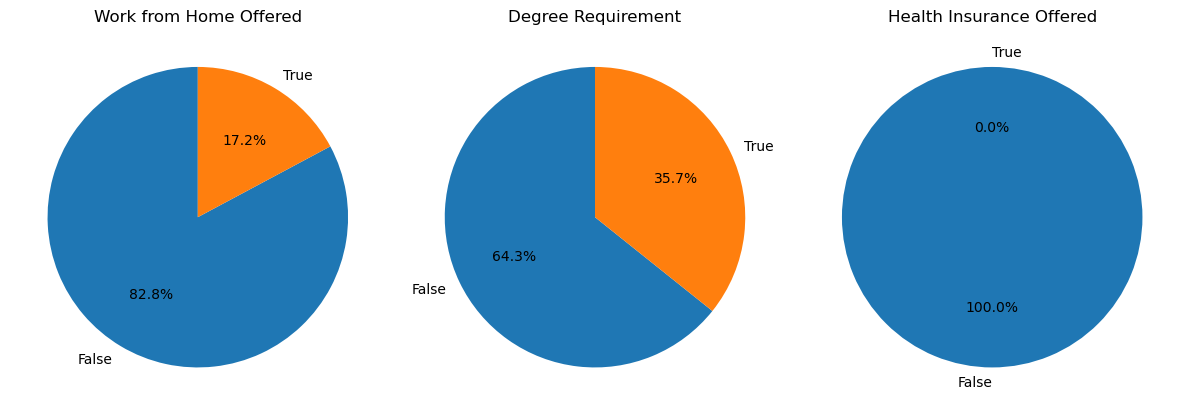

In [45]:
# dict_column = {
#     'job_work_from_home':'Work from Home Offered',
#     'job_no_degree_mention':'Degree Requirement',
#     'job_health_insurance':'Health Insurance Offered'
# }

# fig , ax = plt.subplots(1,3)
# fig.set_size_inches((12,5))

# for i,(columns,title) in enumerate(dict_column.items()):
#     ax[i].pie(df_DA_IN[columns].value_counts(),labels = ['False','True'] ,startangle=90, autopct='%1.1f%%')
#     ax[i].set_title(title)

# plt.show()

import pandas as pd

dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_DA_IN[column].value_counts()
    
    # Ensure both False and True are present in the labels
    if True not in value_counts.index:
        value_counts = pd.concat([value_counts, pd.Series([0], index=[True])])  # Add True with count 0
    if False not in value_counts.index:
        value_counts = pd.concat([value_counts, pd.Series([0], index=[False])])  # Add False with count 0

    # Get the unique values dynamically
    labels = value_counts.index.map(str)

    ax[i].pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()


    

In [46]:
df_DA_IN['job_health_insurance'].value_counts()

job_health_insurance
False    6121
Name: count, dtype: int64

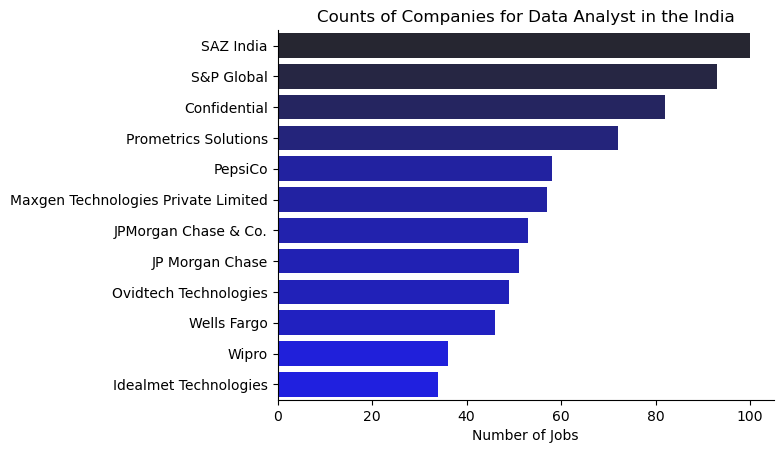

In [55]:
df_IN_Company = df_DA_IN['company_name'].value_counts().head(12).to_frame()
df_IN_Company = df_IN_Company.sort_values(by='count',ascending=False)
sns.barplot(data=df_IN_Company , x='count',y='company_name',hue='count',palette='dark:b_r')
sns.despine()
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.title('Counts of Companies for Data Analyst in the India')
plt.legend().remove()
plt.show()